Assumptions:
1. Fixed-coupon bond

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Price

Here is the general formula for pricing a bond

![alt text](image.png)

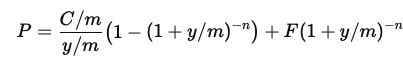

In [2]:
# Python implementation
def bond_price(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the price of a fixed-coupon bond, using the closed-form expression of P.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        float: Present value (price) of the bond
    """
    # Find the total number of periods
    n = int(maturity * freq)
    f = np.pow(1 + ytm/freq, -n)

    # Find the Coupon payment per year
    c = face * coupon_rate / freq
    return (c * (1 - f)) * freq / ytm + face * f


In [3]:
# Example
print(bond_price(1000, 0.05, 0.045, 5, 1))

1021.9498837221463


# Duration

Here is the general formula for finding the Duration of a bond

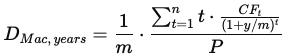

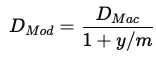

In [4]:
# Python implementation
def bond_duration(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the duration of a fixed-coupon bond.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        np.array: [Dmac, Dmod]
    """
    # Get the Price of the bond
    P = bond_price(face, coupon_rate, ytm, maturity, freq)

    # Find the total number of periods and Coupon payment per period
    n = int(maturity * freq)
    c = face * coupon_rate / freq

    # Construct the series
    times = np.arange(1, n+1)
    factors = times * np.pow(1 + ytm/freq, -times)
    Dmac = (np.sum(factors * c) + factors[-1] * face) / (P * freq)
    Dmod = Dmac / (1 + ytm/freq)
    return np.array([Dmac, Dmod])


In [5]:
# Example
Dmac, Dmod = bond_duration(1000, 0.05, 0.045, 5, 1)
print(f"Macaulay Duration: {Dmac:.4f} years")
print(f"Modified Duration: {Dmod:.4f} years")


Macaulay Duration: 4.5515 years
Modified Duration: 4.3555 years


# Convexity

Here is the general formula for finding the Convexity of a bond

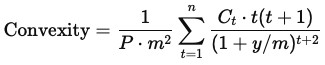

In [6]:
# Python implementation
def bond_convexity(face, coupon_rate, ytm, maturity, freq=1):
    """
    Calculate the convexity of a fixed-coupon bond.
    
    Parameters:
        face (float): Face value of the bond
        coupon_rate (float): Annual coupon rate (e.g., 0.05 for 5%)
        ytm (float): Yield to maturity (as decimal)
        maturity (float): Time to maturity in years
        freq (int): Number of coupon payments per year (1, 2, 4, etc.)
        
    Returns:
        float: Convexity (annualized)
    """
    # Get the Price of the bond
    P = bond_price(face, coupon_rate, ytm, maturity, freq)

    # Find the total number of periods and Coupon payment per period
    n = int(maturity * freq)
    c = face * coupon_rate / freq

    # Construct the series
    times = np.arange(1, n+1)
    factors = (np.pow(times, 2) + times) * np.pow(1 + ytm/freq, -times - 2)
    cash_flows = np.repeat(c, n)
    cash_flows[-1] += face
    return np.sum(factors * cash_flows) / (P * np.pow(freq, 2))


In [7]:
print(bond_duration(face = 1000, coupon_rate = 0.05, ytm = 0.06, maturity = 5, freq = 1))

[4.53465255 4.2779741 ]


# Price - YTM visualization

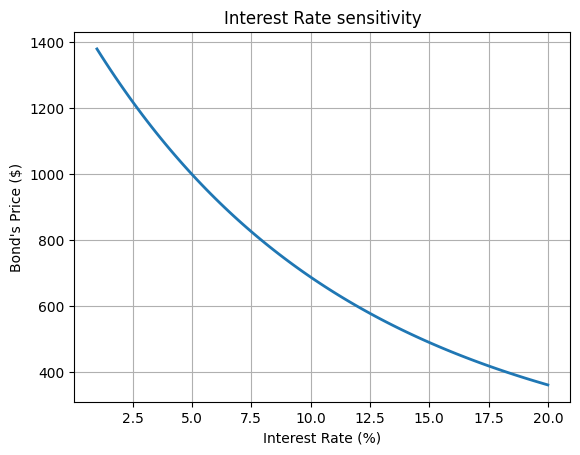

In [14]:
# Example bond
face = 1000
coupon_rate = 0.05
maturity = 10
freq = 2

# Calculate the Bond's price for ytm range 1%-10%
ytm_sweep = np.linspace(0.01, 0.2, 100)
prices = np.array([bond_price(face, coupon_rate, ytm, maturity, freq) for ytm in ytm_sweep])

plt.plot(ytm_sweep*100, prices, lw=2)
plt.title("Interest Rate sensitivity")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Bond's Price ($)")
plt.grid()
plt.show()